In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [12]:
import pickle
with open('df_all.pickle', 'rb') as f:
    df_all = pickle.load(f)

## Primera Transformación


In [21]:
df_all.head()

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,CORAZON,PICAS,DIAMANTES,TREBOL,HAND
0,1,0,1,1,0,0,0,0,0,0,0,1,1,3,2,0,0,0
1,0,1,0,0,2,0,0,0,0,0,1,1,0,0,1,3,1,1
2,0,1,0,1,0,1,0,0,2,0,0,0,0,2,0,2,1,1
3,1,0,0,1,0,1,0,0,0,0,0,0,2,1,2,2,0,1
4,0,1,0,0,0,0,1,0,1,1,1,0,0,1,2,1,1,0


In [14]:
X = df_all.iloc[:, 0:-1]
y = df_all.iloc[:, -1:]

In [15]:
print(X.shape)
print(y.shape)

(1000000, 17)
(1000000, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                    stratify=y_train_full, 
                                                    test_size=0.2,
                                                    random_state = 42)


## Red Neuronal

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation



model = Sequential()
model.add(Dense(100, activation='relu', input_dim=17))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])


history = model.fit(X_train, y_train, epochs = 10, batch_size = 256, verbose=1,validation_data=(X_val, y_val))


Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9541 - val_loss: 0.0112 - val_sparse_categorical_accuracy: 0.9981
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0049 - sparse_categorical_accuracy: 0.9993 - val_loss: 0.0019 - val_sparse_categorical_accuracy: 0.9999
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0012 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.2419e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 5.7513e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.5692e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 4.4658e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.1232e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - 

In [18]:
score = model.evaluate(X_test, y_test, batch_size = 256)
score

782/782 [==============================] - 1s 1ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9996


[0.0011106736492365599, 0.9996399879455566]

In [19]:
pred=model.predict(X_test).argmax(axis=1)


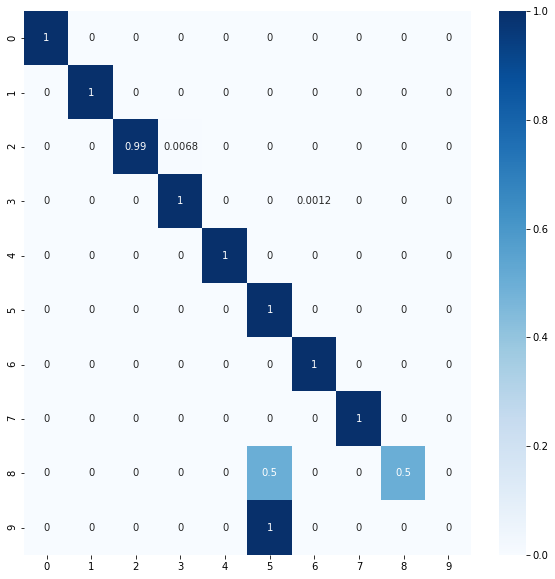

In [20]:
c_matrix = confusion_matrix(y_test, pred, normalize='true')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(c_matrix, annot=True, 
            cmap='Blues', ax=ax);  